# This is the Analysis of the First Part

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import chardet

with open("AMI_GSE66360_series_matrix.csv", "rb") as f:
    result = chardet.detect(f.read(100000))  # Read first 100,000 bytes
    print(result) 



{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [24]:
ROWS_TO_SKIP = 59
FILE_PATH = 'AMI_GSE66360_series_matrix.csv'

raw_df = pd.read_csv(FILE_PATH, skiprows=ROWS_TO_SKIP,  encoding=result['encoding'], header=None)
GENE_AXIS = 0
SAMPLE_AXIS = 1
raw_df.head()

C:\Users\wmata\AppData\Local\Temp\ipykernel_21860\3213269223.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(FILE_PATH, skiprows=ROWS_TO_SKIP,  encoding=result['encoding'], header=None)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,Class,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
2,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
3,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
4,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813


In [25]:
df = raw_df.copy()
df.columns = raw_df.iloc[1]
df.drop(df.index[1], inplace=True)
df.head()


1,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
0,Class,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
2,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
3,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
4,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
5,121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966


In [26]:
df.set_index(['ID_REF'], inplace=True)
df.head()


1,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
ID_REF,,,,,,,,,,,,,,,,,,,,,
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,5.971847425,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966


In [27]:
labels = df.loc['Class'].copy()
df.drop(index=['Class'], inplace=True)
df.head()   


1,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,5.971847425,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
1255_g_at,2.792047952,2.69571445,2.580181122,2.712123845,2.723686912,2.70668403,2.674746672,2.635149735,2.696649177,2.802862883,...,2.924657514,2.714103313,3.635944854,2.710943641,2.979380765,3.73013912,2.914867562,3.013901455,2.729319786,3.151449425


In [28]:
labels.head()

1
GSM1620819    H
GSM1620820    H
GSM1620821    H
GSM1620822    H
GSM1620823    H
Name: Class, dtype: object

##### a. High level description of the data and some pre-processing

1) How many genes profiled?


In [29]:
num_genes = df.shape[GENE_AXIS]
print(f"There are {num_genes} genes profiled in the dataset.")

There are 54675 genes profiled in the dataset.


2) How many samples (subjects/patients) in total?


In [30]:
subject = df.shape[SAMPLE_AXIS]
print(f"There are {subject} subjects profiled in the dataset.")

There are 99 subjects profiled in the dataset.


3) How many samples in each class?


In [31]:
healthy_samples = (labels == "H")
disease_samples = (labels == "M")  # Assuming "D" is the other class

print(f"Healthy samples: {healthy_samples.sum()}")
print(f"Disease samples: {disease_samples.sum()}")

Healthy samples: 50
Disease samples: 49


4) If there are missing values, then remove the entire row
(gene) from the data matrix.
How many rows left now?

In [32]:
cleaned_df = df.apply(pd.to_numeric, errors='coerce')
cleaned_df = cleaned_df.dropna(axis=GENE_AXIS)
print(f"There are {cleaned_df.shape[GENE_AXIS]} genes left after removing genes with missing values.")

There are 54628 genes left after removing genes with missing values.


In [33]:
cleaned_df.head()

1,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,6.016415,...,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
1053_at,8.225790,7.525865,7.764637,7.198461,7.831450,7.203592,7.694551,7.760259,8.279814,7.580841,...,7.226348,7.105538,5.354105,8.271500,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
117_at,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.483590,6.387779,6.307066,...,6.789501,7.441940,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
121_at,6.179478,6.582889,6.602135,6.545905,5.911542,6.285420,6.562316,6.345888,6.272806,5.971847,...,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
1255_g_at,2.792048,2.695714,2.580181,2.712124,2.723687,2.706684,2.674747,2.635150,2.696649,2.802863,...,2.924658,2.714103,3.635945,2.710944,2.979381,3.730139,2.914868,3.013901,2.729320,3.151449


5) Pick 20 genes at random. Draw histograms comparing
expression levels of each of these genes in the two
classes M and H.

In [34]:
selected_genes = cleaned_df.sample(20, axis=GENE_AXIS).index
selected_genes


Index(['1556518_at', '1569536_at', '233964_at', '238122_at', '213857_s_at',
       '224517_at', '216733_s_at', '214380_at', '204316_at', '213402_at',
       '229186_s_at', '1566265_at', '232956_at', '241779_at', '215825_at',
       '214189_s_at', '241049_at', '1564157_at', '203134_at', '243951_at'],
      dtype='object', name='ID_REF')

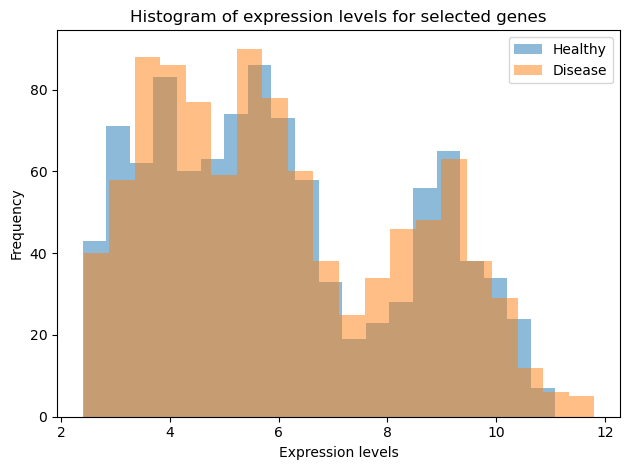

In [53]:
np.random.seed(0)
SAMPLE_AMOUNT = 20
selected_genes = cleaned_df.sample(SAMPLE_AMOUNT, axis=GENE_AXIS).index


df_healthy = cleaned_df.loc[selected_genes, healthy_samples].values.flatten()
df_disease = cleaned_df.loc[selected_genes, disease_samples].values.flatten()

plt.hist(df_healthy, bins=20, alpha=0.5, label='Healthy')
plt.hist(df_disease, bins=20, alpha=0.5, label='Disease')
plt.legend(loc='upper right')
plt.xlabel('Expression levels')
plt.ylabel('Frequency')
plt.title('Histogram of expression levels for selected genes')



plt.tight_layout()
plt.show()

##### b. WRS for differential expression (DE)


1) Consider some gene, g. Under the null model (which assumes that
for g there is no M vs H DE), what is the expected sum of ranks of
g’s expression levels measured for samples labeled M?


In [36]:
sampeled_gene = cleaned_df.sample(1, axis=GENE_AXIS).index[0]
sampeled_gene_ranks = cleaned_df.loc[sampeled_gene].rank()
disease_sum_of_ranks = sampeled_gene_ranks[disease_samples].sum()

print(f"Sum of ranks for the disease samples: {disease_sum_of_ranks}")

Sum of ranks for the disease samples: 2649.0


2) Denote this sum of ranks by RS(g). What is the minimal value, m,
that RS(g) can take?


In [37]:
num_of_disease_samples = disease_samples.sum()
# num_of_samples = cleaned_df.shape[SAMPLE_AXIS]
minimal_RS_disease = (1 + num_of_disease_samples) * num_of_disease_samples / 2
print(f"Minimal possible sum of ranks for the disease samples: {minimal_RS_disease}")


Minimal possible sum of ranks for the disease samples: 1225.0


3) Under the null model, what is the probability of RS(g) = m?
(provide a formula for this and explain it)


4) Under the null model, what is the probability of RS(g) = m+1? what
is the probability of RS(g) = m+2?
(provide formulas and explain them)


5) Draw a histogram of the values of RS(g) in the dataset. Here g
ranges over all genes in the data (after the clean-up)